In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [2]:
df = pd.read_excel('DS - Assignment Part 1 data set.xlsx','工作表1')

In [3]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
# checking for missing values
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [5]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


<AxesSubplot:>

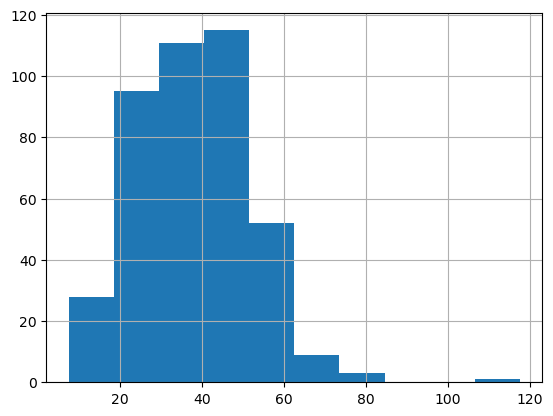

In [6]:
df['House price of unit area'].hist()

In [7]:
df.corr()[['House price of unit area']]

,House price of unit area
Transaction date,0.087529
House Age,-0.210567
Distance from nearest Metro station (km),-0.673613
Number of convenience stores,0.571005
latitude,0.546307
longitude,0.523287
Number of bedrooms,0.050265
House size (sqft),0.046489
House price of unit area,1.000000


In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('House price of unit area',axis=1), df['House price of unit area'], test_size=0.25, random_state=101)

In [9]:
def relevant_feat(df):
    return df.drop('Transaction date',axis =1)

In [10]:
errors = []

# Linear Regression

In [11]:
pipeline_LR = Pipeline([('ft',FunctionTransformer(relevant_feat)),('scaler',StandardScaler()),('model',LinearRegression())])

In [12]:
pipeline_LR.fit(X_train,y_train)

Pipeline(steps=[('ft',
                 FunctionTransformer(func=<function relevant_feat at 0x000001C2771B20D0>)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [13]:
pred_train = pipeline_LR.predict(X_train)

In [14]:
#Root_mean_square_error of train data
mean_squared_error(y_train,pred_train)**0.5

9.571009636822083

In [15]:
pred = pipeline_LR.predict(X_test)

In [16]:
#Root_mean_square_error of test data
mean_squared_error(y_test,pred)**0.5

6.641110477811015

In [17]:
errors.append([9.571009636822083,6.641110477811015])

# Support Vector Regression

In [18]:
param = {'gamma':[0.03,0.1,0.3,1],'C':[0.1,0.3,1,3]}

In [19]:
pipeline_SVR = Pipeline([('ft',FunctionTransformer(relevant_feat)),('scaler',StandardScaler()),('model',GridSearchCV(SVR(),param_grid=param,scoring = 'neg_mean_squared_error'))])

In [20]:
pipeline_SVR.fit(X_train,y_train)

Pipeline(steps=[('ft',
                 FunctionTransformer(func=<function relevant_feat at 0x000001C2771B20D0>)),
                ('scaler', StandardScaler()),
                ('model',
                 GridSearchCV(estimator=SVR(),
                              param_grid={'C': [0.1, 0.3, 1, 3],
                                          'gamma': [0.03, 0.1, 0.3, 1]},
                              scoring='neg_mean_squared_error'))])

In [21]:
pred_train = pipeline_SVR.predict(X_train)

In [22]:
#Root_mean_square_error of train data
mean_squared_error(y_train,pred_train)**0.5

8.770454758772766

In [23]:
pred = pipeline_SVR.predict(X_test)

In [25]:
#Root_mean_square_error of test data
mean_squared_error(y_test,pred)**0.5

5.9449866452431275

In [26]:
errors.append([8.770454758772766,5.9449866452431275])

# KNeighbors Regressor

In [27]:
param = {'n_neighbors':range(1,30)}

In [28]:
pipeline_KNR = Pipeline([('ft',FunctionTransformer(relevant_feat)),('scaler',StandardScaler()),('model',GridSearchCV(KNeighborsRegressor(n_neighbors=10),param_grid=param,scoring = 'neg_mean_squared_error'))])

In [29]:
pipeline_KNR.fit(X_train,y_train)

Pipeline(steps=[('ft',
                 FunctionTransformer(func=<function relevant_feat at 0x000001C2771B20D0>)),
                ('scaler', StandardScaler()),
                ('model',
                 GridSearchCV(estimator=KNeighborsRegressor(n_neighbors=10),
                              param_grid={'n_neighbors': range(1, 30)},
                              scoring='neg_mean_squared_error'))])

In [30]:
pred_train = pipeline_KNR.predict(X_train)

In [31]:
# root_mean_squared_error of train data
mean_squared_error(y_train,pred_train)**0.5

8.527518584030911

In [32]:
pred = pipeline_KNR.predict(X_test)

In [33]:
# root_mean_squared_error of test data
mean_squared_error(y_test,pred)**0.5

6.751101032945094

In [34]:
errors.append([8.527518584030911,6.751101032945094])

# Decision Tree Regressor

In [35]:
param = {'max_depth': [2,4,6,None],'min_samples_split':[2,4,6,8],'min_samples_leaf':[1,2,4,8],'max_features':['auto','sqrt']}

In [36]:
pipeline_DTR = Pipeline([('ft',FunctionTransformer(relevant_feat)),('model',RandomizedSearchCV(DecisionTreeRegressor(),n_iter=20,param_distributions=param))])

In [37]:
pipeline_DTR.fit(X_train,y_train)

Pipeline(steps=[('ft',
                 FunctionTransformer(func=<function relevant_feat at 0x000001C2771B20D0>)),
                ('model',
                 RandomizedSearchCV(estimator=DecisionTreeRegressor(),
                                    n_iter=20,
                                    param_distributions={'max_depth': [2, 4, 6,
                                                                       None],
                                                         'max_features': ['auto',
                                                                          'sqrt'],
                                                         'min_samples_leaf': [1,
                                                                              2,
                                                                              4,
                                                                              8],
                                                         'min_samples_split': [2,
           

In [38]:
pred_train = pipeline_DTR.predict(X_train)

In [39]:
# root_mean_square_error of train data
mean_squared_error(y_train,pred_train)**0.5

8.043408799295507

In [40]:
pred = pipeline_DTR.predict(X_test)

In [41]:
# root_mean_square_error of test data
mean_squared_error(y_test,pred)**0.5

8.03409527715972

In [42]:
errors.append([8.043408799295507,8.03409527715972])

# Random Forest Regressor

In [43]:
param = {'n_estimators':[50,100,200],'max_depth': [2,4,6,None],'min_samples_split':[2,4,6,8],'min_samples_leaf':[1,2,4,8],'max_features':['auto','sqrt'],'bootstrap':[True,False]}

In [44]:
pipeline_RFR = Pipeline([('ft',FunctionTransformer(relevant_feat)),('model',RandomizedSearchCV(RandomForestRegressor(),n_iter=20,param_distributions=param))])

In [45]:
pipeline_RFR.fit(X_train,y_train)

Pipeline(steps=[('ft',
                 FunctionTransformer(func=<function relevant_feat at 0x000001C2771B20D0>)),
                ('model',
                 RandomizedSearchCV(estimator=RandomForestRegressor(),
                                    n_iter=20,
                                    param_distributions={'bootstrap': [True,
                                                                       False],
                                                         'max_depth': [2, 4, 6,
                                                                       None],
                                                         'max_features': ['auto',
                                                                          'sqrt'],
                                                         'min_samples_leaf': [1,
                                                                              2,
                                                                              4,
                   

In [46]:
pred_train = pipeline_RFR.predict(X_train)

In [47]:
# root_mean_squared_error of train data
mean_squared_error(y_train,pred_train)**0.5

5.773238497181599

In [48]:
pred = pipeline_RFR.predict(X_test)

In [49]:
# root_mean_squared_error of test data
mean_squared_error(y_test,pred)**0.5

5.482478621133

In [50]:
errors.append([5.773238497181599,5.482478621133])

# AdaBoost Regressor

In [51]:
param = {'n_estimators':[50,100,200],'learning_rate':[0.01,0.1,0.5,1.0,2],'loss':['linear', 'square', 'exponential']}

In [52]:
pipeline_ABR = Pipeline([('ft',FunctionTransformer(relevant_feat)),('model',RandomizedSearchCV(AdaBoostRegressor(),n_iter=10,param_distributions=param))])

In [53]:
pipeline_ABR.fit(X_train,y_train)

Pipeline(steps=[('ft',
                 FunctionTransformer(func=<function relevant_feat at 0x000001C2771B20D0>)),
                ('model',
                 RandomizedSearchCV(estimator=AdaBoostRegressor(),
                                    param_distributions={'learning_rate': [0.01,
                                                                           0.1,
                                                                           0.5,
                                                                           1.0,
                                                                           2],
                                                         'loss': ['linear',
                                                                  'square',
                                                                  'exponential'],
                                                         'n_estimators': [50,
                                                                          100,
 

In [54]:
pred_train = pipeline_ABR.predict(X_train)

In [55]:
# root_mean_squared_error of train data
mean_squared_error(y_train,pred_train)**0.5

7.630025236214465

In [56]:
pred = pipeline_ABR.predict(X_test)

In [57]:
# root_mean_squared_error of test data
mean_squared_error(y_test,pred)**0.5

5.863616654775037

In [58]:
errors.append([7.630025236214465,5.863616654775037])

# LGBM Regressor

In [82]:
param = {'n_estimators':[50,100,200],'num_leaves':[20,31,40,50],'learning_rate':[0.01,0.03,0.1,0.3,1],'min_child_samples':[10,20,30]}

In [83]:
pipeline_LGBMR = Pipeline([('ft',FunctionTransformer(relevant_feat)),('model',RandomizedSearchCV(LGBMRegressor(),n_iter=20,param_distributions=param))])

In [84]:
pipeline_LGBMR.fit(X_train,y_train)

Pipeline(steps=[('ft',
                 FunctionTransformer(func=<function relevant_feat at 0x000001C2771B20D0>)),
                ('model',
                 RandomizedSearchCV(estimator=LGBMRegressor(), n_iter=20,
                                    param_distributions={'learning_rate': [0.01,
                                                                           0.03,
                                                                           0.1,
                                                                           0.3,
                                                                           1],
                                                         'min_child_samples': [10,
                                                                               20,
                                                                               30],
                                                         'n_estimators': [50,
                                                        

In [85]:
pred_train = pipeline_LGBMR.predict(X_train)

In [86]:
# root_mean_squared_error of train data
mean_squared_error(y_train,pred_train)**0.5

6.415044395120238

In [87]:
pred = pipeline_LGBMR.predict(X_test)

In [88]:
# root_mean_squared_error of test data
mean_squared_error(y_test,pred)**0.5

5.525285327849288

In [89]:
errors.append([6.415044395120238,5.525285327849288])

# XGB Regressor (Extreme Gradient Boost)

In [90]:
XGBRegressor()

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [91]:
param = {'n_estimators':[100,200],'learning_rate':[0.003,0.01,0.03,0.1,0.3,1],'max_leaves':[None,31,50]}

In [92]:
pipeline_XGBR = Pipeline([('ft',FunctionTransformer(relevant_feat)),('model',GridSearchCV(XGBRegressor(),param_grid = param))])

In [93]:
pipeline_XGBR.fit(X_train,y_train)

Pipeline(steps=[('ft',
                 FunctionTransformer(func=<function relevant_feat at 0x000001C2771B20D0>)),
                ('model',
                 GridSearchCV(estimator=XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None, gp...
                                                 

In [94]:
pred_train = pipeline_XGBR.predict(X_train)

In [95]:
# root_mean_squared_error of train data
mean_squared_error(y_train,pred_train)**0.5

1.833984281612409

In [96]:
pred = pipeline_XGBR.predict(X_test)

In [97]:
# root_mean_squared_error of test data
mean_squared_error(y_test,pred)**0.5

5.984710136420102

In [98]:
errors.append([1.833984281612409,5.984710136420102])

In [100]:
ind = ['Linear_Regression','Support_Vector_Regression','KNeighbors_Regressor','Decision_Tree_Regressor','Random_Forest_Regressor','AdaBoost_Regressor','LGBM_Regressor','XGB_Regressor']
errors = pd.DataFrame(errors,index = ind ,columns = ['error_train_data','error_test_data'])

In [101]:
errors

,error_train_data,error_test_data
Linear_Regression,9.571010,6.641110
Support_Vector_Regression,8.770455,5.944987
KNeighbors_Regressor,8.527519,6.751101
Decision_Tree_Regressor,8.043409,8.034095
Random_Forest_Regressor,5.773238,5.482479
AdaBoost_Regressor,7.630025,5.863617
LGBM_Regressor,6.415044,5.525285
XGB_Regressor,1.833984,5.984710


<AxesSubplot:>

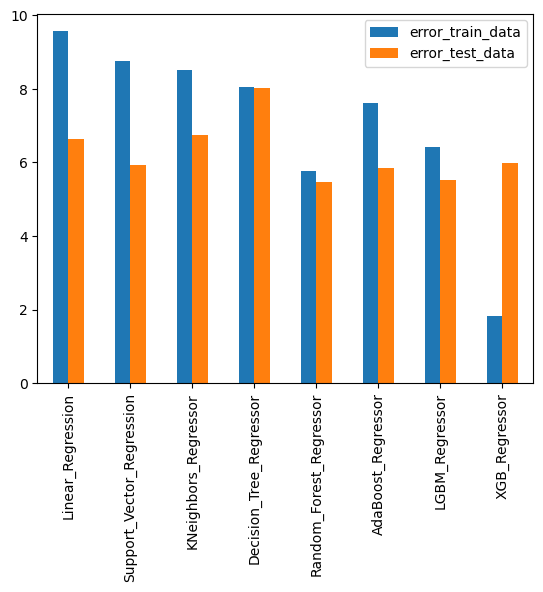

In [116]:
errors.plot.bar(y = ['error_train_data','error_test_data'])